# PyCity Schools Analysis

* As a whole, schools with higher budgets, did not yield better test results. By contrast, schools with higher spending per student actually (645-675 dollars) underperformed compared to schools with smaller budgets (<585 dollars per student).

* However, this trend disappears when looking only at charter schools or only at district schools. There was no consistent trend when looking at spending per student between the district and charter school populations.

* As a whole, smaller and medium sized schools dramatically out-performed large sized schools on passing math performances (94-95% passing vs 73-74%). 

* All of the Charter schools had populations below the mean of the study. All of the District schools had populations above the mean. Therefore, no conclusion can be drawn based on performance and school size.

* As a whole, charter schools out-performed the public district schools across all metrics. However, more analysis will be required to glean if the effect is due to school practices or the fact that charter schools tend to serve smaller student populations per school. 
---

### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [106]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File to Load (Remember to Change These)
school_file = "Resources/schools_complete.csv"
student_file = "Resources/students_complete.csv"

# Read School and Student Data File and store into Pandas Data Frames
school_data = pd.read_csv(school_file)
student_data = pd.read_csv(student_file)

# Combine the data into a single dataset
school_df = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])


## District Summary

* Calculate the total number of schools

* Calculate the total number of students

* Calculate the total budget

* Calculate the average math score 

* Calculate the average reading score

* Calculate the overall passing rate (overall average score), i.e. (avg. math score + avg. reading score)/2

* Calculate the percentage of students with a passing math score (70 or greater)

* Calculate the percentage of students with a passing reading score (70 or greater)

* Create a dataframe to hold the above results

* Optional: give the displayed data cleaner formatting

In [107]:
#Calculate the number of schools
num_schools = len(school_df['school_name'].unique())

In [108]:
#Calculate the total number of students
num_students = school_df['Student ID'].count()

In [109]:
#Calculate the total budget
budget_total = school_df['budget'].unique().sum() #We could just pull these from the school_data df too

In [110]:
#Calculate the average math score
#Calculate the average reading score
math_mean = school_df['math_score'].mean()
reading_mean = school_df['reading_score'].mean()

In [111]:
# Calculate the percentage of students with a passing math score (70 or greater)
pass_math = school_df.loc[school_df['math_score'] >= 70, :]
pct_pass_math = len(pass_math)*100/num_students
pct_pass_math

74.9808526933878

In [112]:
# Calculate the percentage of students with a passing reading score (70 or greater)
pass_read = school_df.loc[school_df['reading_score'] >= 70, :]
pct_pass_read = len(pass_read)*100/num_students
pct_pass_read

85.80546336482001

In [113]:
# Calculate the overall passing rate (overall average score), i.e. (avg. math score + avg. reading score)/2
passing_rate = (math_mean + reading_mean)/2
passing_rate

80.43160582078121

In [114]:
# Create a dataframe to hold the above results
district_summary = pd.DataFrame({"Number of Schools":len(school_df['school_name'].unique()),
                               "Number of Students":len(school_df),
                               "Total Budget":school_df.budget.unique().sum(),
                               "Avgerage Math Score":school_df.math_score.mean(),
                               "Avgerage Reading Score":school_df.reading_score.mean(),
                               "% Passing Math": [pct_pass_math],
                               "% Passing Reading": [pct_pass_read],
                               "Overall Passing Rate": [passing_rate]})


In [115]:
district_summary['Number of Students'] = district_summary['Number of Students'].map('{:,}'.format)
district_summary['Total Budget'] = district_summary['Total Budget'].map('${:,}'.format)
district_summary['Avgerage Math Score'] = district_summary['Avgerage Math Score'].map('{:.2f}'.format)
district_summary['Avgerage Reading Score'] = district_summary['Avgerage Reading Score'].map('{:.2f}'.format)
district_summary['% Passing Math'] = district_summary['% Passing Math'].map('{:.2f}%'.format)
district_summary['% Passing Reading'] = district_summary['% Passing Reading'].map('{:.2f}%'.format)
district_summary['Overall Passing Rate'] = district_summary['Overall Passing Rate'].map('{:.2f}%'.format)

district_summary

,Number of Schools,Number of Students,Total Budget,Avgerage Math Score,Avgerage Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
0,15,"39,170","$24,649,428",78.99,81.88,74.98%,85.81%,80.43%


## School Summary

* Create an overview table that summarizes key metrics about each school, including:
  * School Name
  * School Type
  * Total Students
  * Total School Budget
  * Per Student Budget
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * Overall Passing Rate (Average of the above two)
  
* Create a dataframe to hold the above results

In [116]:
#Group by school name to get overview of School, Type, Total Students, Per Student Budget, Average math & reading
school_grouped_df = school_df.groupby(school_df['school_name'])
total_students = school_grouped_df.student_name.size()
school_budget = school_grouped_df.budget.first()
student_budget = school_budget/total_students
avg_math = school_grouped_df.math_score.mean()
avg_reading = school_grouped_df.reading_score.mean()

In [117]:
school_type = school_grouped_df.type.first()

In [118]:
# Find the percentage of students passing reading
pass_read_grouped = pass_read.groupby(pass_read.school_name)
num_pass_read = pass_read_grouped.count()
pct_pass_read = num_pass_read.reading_score*100/total_students

In [119]:
#Find the percentage of students passing math
pass_math_grouped = pass_math.groupby(pass_math.school_name)
num_pass_math = pass_math_grouped.count()
pct_pass_math = num_pass_math.math_score*100/total_students

In [120]:
#Find the overall rate of passing
overall_pass_rate = (pct_pass_read + pct_pass_math)/2

In [121]:
school_summary = pd.DataFrame({'School Type':school_type,
                                'Total Students': total_students,
                               'School Budget': school_budget,
                               'Student Budget' : student_budget,
                               'Average Math Score' : avg_math,
                               'Average Reading Score': avg_reading,
                               '% Passing Math' : pct_pass_math,
                               '% Passing Reading' : pct_pass_read,
                               '% Overall Passing Rate': overall_pass_rate
})
school_summary.index.names = ['School Name'] #remove the ugly index name
school_summary

,School Type,Total Students,School Budget,Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
School Name,,,,,,,,,
Bailey High School,District,4976,3124928,628.0,77.048432,81.033963,66.680064,81.933280,74.306672
Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780,94.133477,97.039828,95.586652
Figueroa High School,District,2949,1884411,639.0,76.711767,81.158020,65.988471,80.739234,73.363852
Ford High School,District,2739,1763916,644.0,77.102592,80.746258,68.309602,79.299014,73.804308
Griffin High School,Charter,1468,917500,625.0,83.351499,83.816757,93.392371,97.138965,95.265668
Hernandez High School,District,4635,3022020,652.0,77.289752,80.934412,66.752967,80.862999,73.807983
Holden High School,Charter,427,248087,581.0,83.803279,83.814988,92.505855,96.252927,94.379391
Huang High School,District,2917,1910635,655.0,76.629414,81.182722,65.683922,81.316421,73.500171
Johnson High School,District,4761,3094650,650.0,77.072464,80.966394,66.057551,81.222432,73.639992


In [122]:
# Optional: give the displayed data cleaner formatting
school_summary_rf = pd.DataFrame()
school_summary_rf['School Type'] = school_summary['School Type']
school_summary_rf['Total Students'] = school_summary['Total Students'].map('{:,}'.format)
school_summary_rf['School Budget'] = school_summary['School Budget'].map('${:,}'.format)
school_summary_rf['Student Budget'] = school_summary['Student Budget'].map('${:.0f}'.format)
school_summary_rf['Average Math Score'] = school_summary['Average Math Score'].map('{:.2f}'.format)
school_summary_rf['Average Reading Score'] = school_summary['Average Reading Score'].map('{:.2f}'.format)
school_summary_rf['% Passing Math'] = school_summary['% Passing Math'].map('{:.2f}%'.format)
school_summary_rf['% Passing Reading'] = school_summary['% Passing Reading'].map('{:.2f}%'.format)
school_summary_rf['% Overall Passing Rate'] = school_summary['% Overall Passing Rate'].map('{:.4f}%'.format)

school_summary_rf.head()

,School Type,Total Students,School Budget,Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
School Name,,,,,,,,,
Bailey High School,District,"4,976","$3,124,928",$628,77.05,81.03,66.68%,81.93%,74.3067%
Cabrera High School,Charter,"1,858","$1,081,356",$582,83.06,83.98,94.13%,97.04%,95.5867%
Figueroa High School,District,"2,949","$1,884,411",$639,76.71,81.16,65.99%,80.74%,73.3639%
Ford High School,District,"2,739","$1,763,916",$644,77.10,80.75,68.31%,79.30%,73.8043%
Griffin High School,Charter,"1,468","$917,500",$625,83.35,83.82,93.39%,97.14%,95.2657%


## Schools sorted by type, number of students and per student budget

In [123]:
summary_sorted = school_summary.sort_values(['School Type', 'Total Students', 'Student Budget'])
summary_sorted

,School Type,Total Students,School Budget,Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
School Name,,,,,,,,,
Holden High School,Charter,427,248087,581.0,83.803279,83.814988,92.505855,96.252927,94.379391
Pena High School,Charter,962,585858,609.0,83.839917,84.044699,94.594595,95.945946,95.270270
Griffin High School,Charter,1468,917500,625.0,83.351499,83.816757,93.392371,97.138965,95.265668
Thomas High School,Charter,1635,1043130,638.0,83.418349,83.848930,93.272171,97.308869,95.290520
Shelton High School,Charter,1761,1056600,600.0,83.359455,83.725724,93.867121,95.854628,94.860875
Wright High School,Charter,1800,1049400,583.0,83.682222,83.955000,93.333333,96.611111,94.972222
Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780,94.133477,97.039828,95.586652
Wilson High School,Charter,2283,1319574,578.0,83.274201,83.989488,93.867718,96.539641,95.203679
Ford High School,District,2739,1763916,644.0,77.102592,80.746258,68.309602,79.299014,73.804308


## Top Performing Schools (By Passing Rate)

* Sort and display the top five schools in overall passing rate

In [124]:
top_schools = school_summary_rf.sort_values(['% Overall Passing Rate'], ascending=False)
top_schools.head(5)

,School Type,Total Students,School Budget,Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
School Name,,,,,,,,,
Cabrera High School,Charter,"1,858","$1,081,356",$582,83.06,83.98,94.13%,97.04%,95.5867%
Thomas High School,Charter,"1,635","$1,043,130",$638,83.42,83.85,93.27%,97.31%,95.2905%
Pena High School,Charter,962,"$585,858",$609,83.84,84.04,94.59%,95.95%,95.2703%
Griffin High School,Charter,"1,468","$917,500",$625,83.35,83.82,93.39%,97.14%,95.2657%
Wilson High School,Charter,"2,283","$1,319,574",$578,83.27,83.99,93.87%,96.54%,95.2037%


## Bottom Performing Schools (By Passing Rate)

* Sort and display the five worst-performing schools

In [125]:
bottom_schools = school_summary_rf.sort_values('% Overall Passing Rate', ascending=True)
bottom_schools.head()

,School Type,Total Students,School Budget,Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
School Name,,,,,,,,,
Rodriguez High School,District,"3,999","$2,547,363",$637,76.84,80.74,66.37%,80.22%,73.2933%
Figueroa High School,District,"2,949","$1,884,411",$639,76.71,81.16,65.99%,80.74%,73.3639%
Huang High School,District,"2,917","$1,910,635",$655,76.63,81.18,65.68%,81.32%,73.5002%
Johnson High School,District,"4,761","$3,094,650",$650,77.07,80.97,66.06%,81.22%,73.6400%
Ford High School,District,"2,739","$1,763,916",$644,77.10,80.75,68.31%,79.30%,73.8043%


## Math Scores by Grade

* Create a table that lists the average Reading Score for students of each grade level (9th, 10th, 11th, 12th) at each school.

  * Create a pandas series for each grade. Hint: use a conditional statement.
  
  * Group each series by school
  
  * Combine the series into a dataframe
  
  * Optional: give the displayed data cleaner formatting

In [126]:
#Make the index names slighly prettier
school_df = school_df.rename(str.title, axis='columns')
school_df.columns

Index(['Student Id', 'Student_Name', 'Gender', 'Grade', 'School_Name',
       'Reading_Score', 'Math_Score', 'School Id', 'Type', 'Size', 'Budget'],
      dtype='object')

In [130]:
grd = {'9th':9, '10th':10, '11th':11,'12th':12}

school_df_grade['Grade'] = school_df['Grade'].map(grd)
school_df_grade = school_df_grade.sort_values('Grade')
school_df_grade.reset_index(drop=True)
math_grade = school_df_grade.groupby(['School_Name', 'Grade'])['Math_Score'].mean().unstack()
math_grade

Grade,9,10,11,12
School_Name,,,,
Bailey High School,77.083676,76.996772,77.515588,76.492218
Cabrera High School,83.094697,83.154506,82.765560,83.277487
Figueroa High School,76.403037,76.539974,76.884344,77.151369
Ford High School,77.361345,77.672316,76.918058,76.179963
Griffin High School,82.044010,84.229064,83.842105,83.356164
Hernandez High School,77.438495,77.337408,77.136029,77.186567
Holden High School,83.787402,83.429825,85.000000,82.855422
Huang High School,77.027251,75.908735,76.446602,77.225641
Johnson High School,77.187857,76.691117,77.491653,76.863248


## Reading Score by Grade 

* Perform the same operations as above for reading scores

In [131]:
read_grade = school_df_grade.groupby(['School_Name', 'Grade'])['Reading_Score'].mean().unstack()
read_grade

Grade,9,10,11,12
School_Name,,,,
Bailey High School,81.303155,80.907183,80.945643,80.912451
Cabrera High School,83.676136,84.253219,83.788382,84.287958
Figueroa High School,81.198598,81.408912,80.640339,81.384863
Ford High School,80.632653,81.262712,80.403642,80.662338
Griffin High School,83.369193,83.706897,84.288089,84.013699
Hernandez High School,80.866860,80.660147,81.396140,80.857143
Holden High School,83.677165,83.324561,83.815534,84.698795
Huang High School,81.290284,81.512386,81.417476,80.305983
Johnson High School,81.260714,80.773431,80.616027,81.227564


## Scores by School Spending

* Create a table that breaks down school performances based on average Spending Ranges (Per Student). Use 4 reasonable bins to group school spending. Include in the table each of the following:
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * Overall Passing Rate (Average of the above two)

In [132]:
#Remove unnecessary columns
spending = school_summary.iloc[:, 2:9]

#Create sample bins based on mean +/- 0.5 standard deviation x 3
bins = [0, 593, 607, 621, 635, 650, 665]
labels = ["<$593", "$594-607", "$608-621", "$622-635", "$636-650","651-655"]

spending["Spending Ranges (Per Student)"] = pd.cut(spending["Student Budget"], bins, labels=labels)
# # Create a GroupBy object based upon spending ranges per student
spending = spending.groupby('Spending Ranges (Per Student)').mean()
spending

,School Budget,Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
Spending Ranges (Per Student),,,,,,,
<$593,924604.25,581.0,83.455399,83.933814,93.460096,96.610877,95.035486
$594-607,1056600.00,600.0,83.359455,83.725724,93.867121,95.854628,94.860875
$608-621,585858.00,609.0,83.839917,84.044699,94.594595,95.945946,95.270270
$622-635,2021214.00,626.5,80.199966,82.425360,80.036217,89.536122,84.786170
$636-650,2066694.00,641.6,78.229576,81.492857,71.998877,83.757921,77.878399
651-655,2466327.50,653.5,76.959583,81.058567,66.218444,81.089710,73.654077


## Scores by School Size

* Perform the same operations as above, based on school size.

In [133]:
#Drop unnecessary columns
size_df = school_summary.drop(['School Budget','Student Budget'], axis=1)

#size_df.dtypes - need to change the data type for students
size_df['Total Students'] = size_df['Total Students'].astype('float64')

# Create bins based roughly on 0.5 stdev, labels and cut the dataframe
bins = [0, 1420, 2130, 2840, 3550, 4260, 5000]
labels = ["<1420", "1421-2130", "2131-2700", "2701-3550", "3551-4260", ">4260"]
size_df["Total Students"] = pd.cut(size_df["Total Students"], bins, labels=labels)

# Create a GroupBy object based upon total students
size_df = size_df.groupby('Total Students').mean()
size_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
Total Students,,,,,
<1420,83.821598,83.929843,93.550225,96.099437,94.824831
1421-2130,83.374684,83.864438,93.599695,96.790680,95.195187
2131-2700,80.188396,82.367873,81.088660,87.919328,84.503994
2701-3550,76.670590,81.170371,65.836196,81.027827,73.432012
3551-4260,76.842711,80.744686,66.366592,80.220055,73.293323
>4260,77.136883,80.978256,66.496861,81.339570,73.918215


<Figure size 432x288 with 0 Axes>

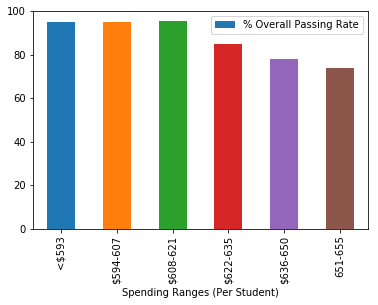

In [134]:
plt.figure();
chart = spending.plot(y='% Overall Passing Rate', kind='bar')

## Scores by School Type

* Perform the same operations as above, based on school type.

In [135]:
#Merge to get school type
school_summary_types = pd.merge(school_summary, school_data, right_on='school_name',left_on='School Name', how='right')
types_df = school_summary_types.set_index('type')
types_df = types_df.drop(['Student Budget','Total Students', 'School Budget', 'School ID', 'budget','school_name', 'size'], axis=1)

# Create a GroupBy object based upon total students
types_df_grouped = types_df.groupby('School Type')

scores_by_school_type = types_df_grouped.mean()
scores_by_school_type

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
School Type,,,,,
Charter,83.473852,83.896421,93.620830,96.586489,95.103660
District,76.956733,80.966636,66.548453,80.799062,73.673757


<Figure size 432x288 with 0 Axes>

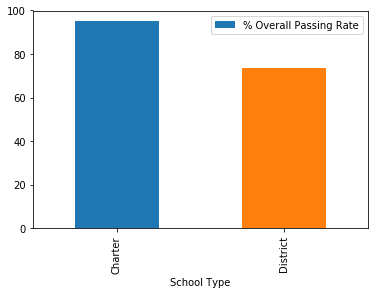

In [43]:
plt.figure();
chart = scores_by_school_type.plot(y='% Overall Passing Rate', kind='bar')